#### Predicts the price of Google (GOOG) stock for a specific day using machine learning algorithms
#### Used the radial basis function kernel, or RBF in Support Vector Regression (SVR), linear and polynomial regression

In [23]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [24]:
# Load stock data
company = "GOOG"
start = dt.date(2022, 1, 1)
end = dt.date(2022, 1, 31)

df = web.DataReader(company, "yahoo", start, end)
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,2911.000000,2870.050049,2889.510010,2901.489990,1260700,2901.489990
2022-01-04,2932.199951,2876.322998,2911.010010,2888.330078,1146400,2888.330078
2022-01-05,2885.959961,2750.469971,2883.620117,2753.070068,2482100,2753.070068
2022-01-06,2793.719971,2735.270020,2749.949951,2751.020020,1452500,2751.020020
2022-01-07,2765.094971,2715.780029,2758.100098,2740.090088,970400,2740.090088
2022-01-10,2772.800049,2662.810059,2701.979980,2771.479980,1704800,2771.479980
2022-01-11,2806.590088,2736.270020,2763.610107,2800.350098,1175100,2800.350098
2022-01-12,2856.284912,2822.239990,2831.090088,2832.959961,1182100,2832.959961
2022-01-13,2863.709961,2778.280029,2836.810059,2782.620117,1328300,2782.620117


In [25]:
# Show and store the last row of data
actual_price = df.tail(1)
# Show the data
actual_price


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-31,2716.870117,2645.47998,2683.959961,2713.969971,1702800,2713.969971


In [26]:
# Get all of the data except the last row
df = df.head(len(df) - 1)
# Show the data set
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,2911.000000,2870.050049,2889.510010,2901.489990,1260700,2901.489990
2022-01-04,2932.199951,2876.322998,2911.010010,2888.330078,1146400,2888.330078
2022-01-05,2885.959961,2750.469971,2883.620117,2753.070068,2482100,2753.070068
2022-01-06,2793.719971,2735.270020,2749.949951,2751.020020,1452500,2751.020020
2022-01-07,2765.094971,2715.780029,2758.100098,2740.090088,970400,2740.090088
2022-01-10,2772.800049,2662.810059,2701.979980,2771.479980,1704800,2771.479980
2022-01-11,2806.590088,2736.270020,2763.610107,2800.350098,1175100,2800.350098
2022-01-12,2856.284912,2822.239990,2831.090088,2832.959961,1182100,2832.959961
2022-01-13,2863.709961,2778.280029,2836.810059,2782.620117,1328300,2782.620117


In [27]:
# Create empty lists
days = list()
adj_close_prices = list()


In [28]:
df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [29]:
# Get only the dates and the adjusted close prices
df_days = df.index.date
df_adj_close = df.loc[:, 'Adj Close']

In [30]:
# Create the independent data set (dates)
for day in df_days:
    days.append([int(str(day).split('-')[2])])
# Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [31]:
# Show the days
days

[[3],
 [4],
 [5],
 [6],
 [7],
 [10],
 [11],
 [12],
 [13],
 [14],
 [18],
 [19],
 [20],
 [21],
 [24],
 [25],
 [26],
 [27],
 [28]]

In [32]:
# Show the adj close prices
adj_close_prices

[2901.489990234375,
 2888.330078125,
 2753.070068359375,
 2751.02001953125,
 2740.090087890625,
 2771.47998046875,
 2800.35009765625,
 2832.9599609375,
 2782.6201171875,
 2795.72998046875,
 2725.81005859375,
 2713.0400390625,
 2670.1298828125,
 2601.840087890625,
 2607.43994140625,
 2534.7099609375,
 2584.800048828125,
 2582.419921875,
 2665.7900390625]

In [33]:
# Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)
# Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
# Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)


SVR(C=1000.0, gamma=0.85)

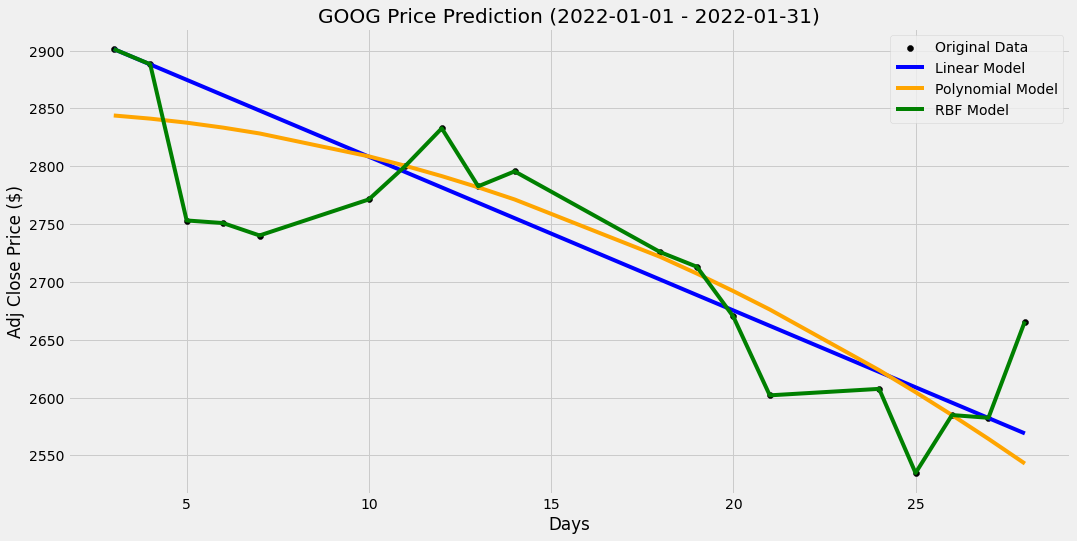

In [34]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, lin_svr.predict(days), color = 'blue', label='Linear Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.title(f'{company} Price Prediction ({start} - {end})')
plt.legend()
plt.show()

In [35]:

# Show the predicted price for the given day
day = [[31]]
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))
print('The RBF SVR predicted:', rbf_svr.predict(day))

The Linear SVR predicted: [2529.14157715]
The Polynomial SVR predicted: [2474.20862235]
The RBF SVR predicted: [2722.8491408]


In [36]:
# Show the actual price
print('The actual price:', actual_price['Adj Close'][str(end)])

The actual price: 2713.969970703125
